In [1]:
#!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached matplotlib-3.2.2-cp38-cp38-win_amd64.whl (9.2 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached scipy-1.4.1-cp38-cp38-win_amd64.whl (31.0 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached google_auth-1.35.0-py2.py3-none-any.whl (152 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
  Attempting u

In [4]:
import os
import time
import uuid
import cv2

ModuleNotFoundError: No module named 'cv2'

In [3]:
pip list

Package                      Version
---------------------------- --------------------
absl-py                      1.3.0
albumentations               1.3.0
asttokens                    2.0.8
astunparse                   1.6.3
async-generator              1.10
attrs                        22.1.0
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.5
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
entrypoints                  0.4
exceptiongroup               1.0.1
executing                    1.1.1
flatbuffers                  22.10.26
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.13.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       

<B> Collecting Images with Open CV</B>

In [2]:
Images_Path= os.path.join('Data','Images')
Images_Num=30
Images_Path

'Data\\Images'

In [ ]:
cap=cv2.VideoCapture(0)
for img in range(Images_Num):
    #print('Collecting Image {}'.format(img))
    ret,frame=cap.read()
    img_name=os.path.join(Images_Path,f'{str(uuid.uuid1())}.jpg')
    #print(img_name)
    cv2.imwrite(img_name,frame)
    cv2.imshow('frame',frame)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<B> Annotate Images with LabelMe </B>

In [ ]:
!labelme

<B> 2.1 Import TF and Deps </B>

In [8]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

<B> 2.2 Limit the CPU growth </B>

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')
#Checking if the GPU is available

[]

<b> 2.3 Load Images into the TF  Data Pipeline </b>

In [4]:
images = tf.data.Dataset.list_files('Data\\Images\\*.jpg')
images.as_numpy_iterator().next()

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: Data\\Images\\*.jpg'

In [5]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [34]:
images = images.map(load_image)

In [35]:
images.as_numpy_iterator().next()

array([[[122, 116, 100],
        [122, 116, 100],
        [124, 116, 103],
        ...,
        [140, 161, 164],
        [139, 158, 162],
        [136, 155, 159]],

       [[119, 113,  99],
        [118, 112,  98],
        [120, 112, 101],
        ...,
        [137, 158, 161],
        [138, 157, 161],
        [135, 154, 158]],

       [[117, 111,  99],
        [116, 110,  98],
        [116, 107,  98],
        ...,
        [135, 156, 161],
        [136, 155, 161],
        [134, 153, 159]],

       ...,

       [[158, 155, 136],
        [161, 156, 137],
        [161, 154, 136],
        ...,
        [148, 138, 129],
        [149, 139, 130],
        [149, 139, 130]],

       [[158, 164, 152],
        [157, 163, 151],
        [160, 163, 152],
        ...,
        [148, 138, 129],
        [148, 135, 126],
        [147, 134, 125]],

       [[215, 227, 217],
        [210, 222, 212],
        [210, 220, 211],
        ...,
        [143, 133, 124],
        [144, 130, 121],
        [141, 127, 118]]

# We need the images to load in the tensorflow datapipeline format
type(images)

<B>2.4 View Raw Images with Matplotlib</b>

In [36]:
# Taking 4 images at once as a batch
image_generator = images.batch(4).as_numpy_iterator()

In [37]:
plot_images = image_generator.next()

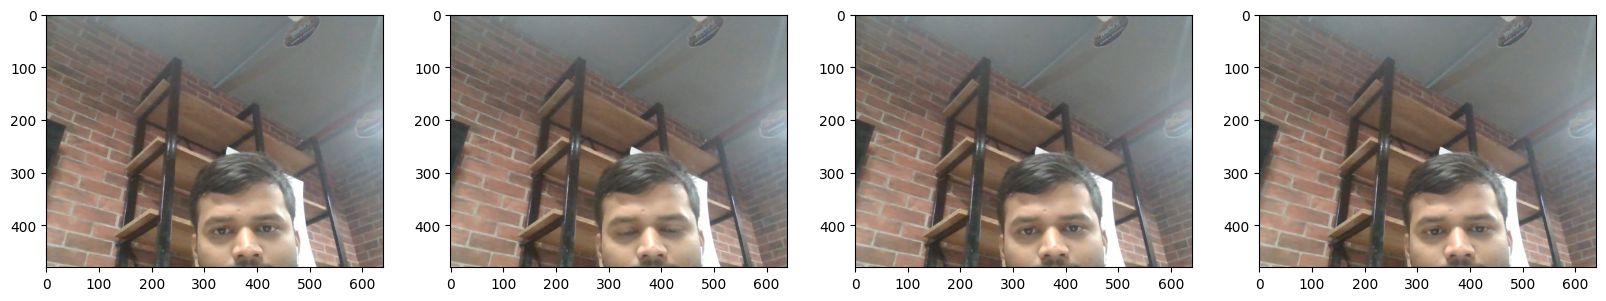

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

<B> 3.Partition Umaugmented Data </B><BR>
<b>3.1 MANUALLY SPLIT DATA INTO TRAIN TEST AND VAL</b>

In [8]:
90*.7 # 63 to train

62.99999999999999

In [9]:
90*.15 # 14 and 13 to test and val

13.5

<b> 3.2 Move the Matching Labels </b>

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

<b> 4. Apply Image Augmentation on Images and Labels using Albumentations</b><br>
<b> 4.1 Setup Albumentations Transform Pipeline </b>

In [39]:
import albumentations as alb

In [40]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

<B> 5 Build and Run Augmentation Pipeline </B>

In [27]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))
            #print("Opened the label!",)

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!
Opened the label!


<B> 5.2 Loading images in the tensorflow datasets </b>

In [6]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [7]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [8]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [44]:
train_images.as_numpy_iterator().next()

array([[[0.8123162 , 0.70643383, 0.6632966 ],
        [0.80655634, 0.6954044 , 0.6627451 ],
        [0.8115809 , 0.6978554 , 0.669424  ],
        ...,
        [0.97745097, 0.8872549 , 0.8637255 ],
        [0.9757966 , 0.8856005 , 0.8620711 ],
        [0.98523283, 0.8901348 , 0.86427695]],

       [[0.800674  , 0.6947917 , 0.65520835],
        [0.8009191 , 0.69417894, 0.6602941 ],
        [0.8038603 , 0.6901348 , 0.6666054 ],
        ...,
        [0.9768995 , 0.88278186, 0.8670956 ],
        [0.9838848 , 0.886826  , 0.86672795],
        [0.9747549 , 0.88161767, 0.8546569 ]],

       [[0.81764704, 0.7117647 , 0.6764706 ],
        [0.8004902 , 0.69460785, 0.6602941 ],
        [0.8098652 , 0.6961397 , 0.6726103 ],
        ...,
        [0.9769608 , 0.8867647 , 0.8632353 ],
        [0.97990197, 0.88284314, 0.8627451 ],
        [0.9841299 , 0.8913603 , 0.8691176 ]],

       ...,

       [[0.24662991, 0.07352941, 0.03841912],
        [0.25882354, 0.07450981, 0.04313726],
        [0.26237744, 0

<B> 6.Prepare Labels </B>

<b> 6.1 Build label loading function </b>

In [9]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

<b> 6.2 Load Labels to Tensorflow Dataset</b>

In [10]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [11]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [12]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

<b> 7.Combine Label and Image Samples </b>

<b> 7.1 Check Partition Lengths </b>

In [50]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 840, 840, 780, 780)

<b>7.2 Create Final Datasets (Images/Labels)</b>

In [13]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [14]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [15]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [56]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[0.3784, 0.3325, 0.7344, 0.8164],
        [0.2186, 0.0864, 0.648 , 0.6924],
        [0.1095, 0.0814, 0.609 , 0.8027],
        [0.3472, 0.    , 0.907 , 0.719 ],
        [0.8887, 0.    , 1.    , 0.9062],
        [0.    , 0.    , 0.    , 0.    ],
        [0.58  , 0.    , 1.    , 0.7056],
        [0.3306, 0.4463, 0.716 , 0.9473]], dtype=float16))

<b> 7.3 View Images and Annotations </b>

In [15]:
data_samples = train.as_numpy_iterator()

In [16]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


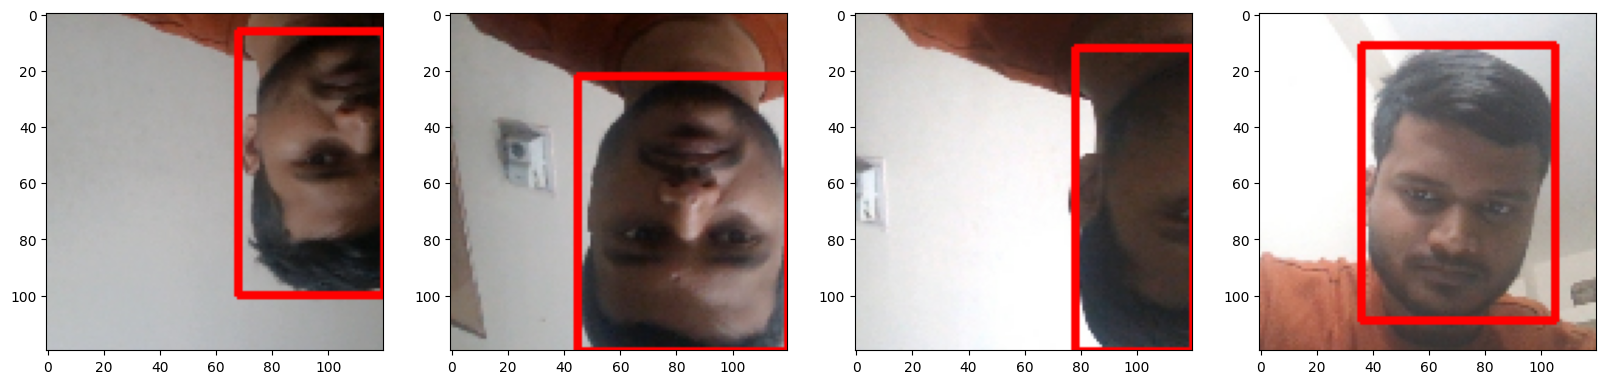

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

<b> 8. Build Deep Learning using the Functional API </b>

<b> 8.1 Import Layers and Base Network </b>

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

<b>8.2 Download VGG16</b>

In [17]:
vgg = VGG16(include_top=False)

In [7]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

<b> 8.3 Build instance of Network </b>

In [18]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model - regression Problem
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

<b> 8.4 Test out Neural Network </b>

In [19]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [20]:
X,y = train.as_numpy_iterator().next()

In [27]:
#X Contains the information about the actual image
y # contains the information, if the object is there or not and if it is there then the bounding box coordinates for it

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.464  , 0.04654, 1.     , 0.9097 ],
        [0.1727 , 0.     , 0.748  , 0.7607 ],
        [0.071  , 0.347  , 0.4058 , 0.84   ],
        [0.1879 , 0.     , 0.8545 , 0.694  ],
        [0.     , 0.4424 , 0.3457 , 0.955  ],
        [0.3206 , 0.1456 , 0.677  , 0.6294 ],
        [0.4995 , 0.1544 , 1.     , 0.937  ],
        [0.2925 , 0.4136 , 0.629  , 0.878  ]], dtype=float16))

In [21]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 652ms/step


In [31]:
classes # use sigmoid for the final results 0 or 1

array([[0.54830503],
       [0.58924973],
       [0.60889995],
       [0.57493997],
       [0.55820847],
       [0.71675676],
       [0.5860035 ],
       [0.6104887 ]], dtype=float32)

In [32]:
coords # coordinates for the bounding boxes

array([[0.5363146 , 0.45965543, 0.45415747, 0.27870575],
       [0.62999785, 0.38272658, 0.5215621 , 0.31676197],
       [0.5998879 , 0.50505245, 0.4080208 , 0.34880286],
       [0.64607114, 0.37105238, 0.5713319 , 0.3456162 ],
       [0.5713342 , 0.5161059 , 0.47940663, 0.32783553],
       [0.6197261 , 0.5551589 , 0.4403994 , 0.3808807 ],
       [0.5705631 , 0.5015401 , 0.5009764 , 0.36783072],
       [0.5640819 , 0.50067437, 0.4585234 , 0.40994942]], dtype=float32)

<b> 9. Define Losses and Optimizers</b>

<b> 9.1 Define Optimizer and LR </b>

In [22]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [23]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

<b> 9.2 Create Localization Loss and Classification Loss </b>

In [24]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [25]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

<b>9.3 Test Out loss metrics </b>

In [38]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.439943>

In [39]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.51542306>

In [40]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.439943>

<b>10. Train Neural Network </b> 

<b> 10.1 Create Custom Model Class </b>

In [26]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [27]:
model = FaceTracker(facetracker)

In [28]:
model.compile(opt,classloss,regressloss)

<b> 10.2 Train the model </b>

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - 786s 2s/step - total_loss: 0.2266 - class_loss: 0.0381 - regress_loss: 0.2075 - val_total_loss: 0.0114 - val_class_loss: 0.0010 - val_regress_loss: 0.0109
Epoch 2/10
473/473 [==============================] - 781s 2s/step - total_loss: 0.0228 - class_loss: 0.0036 - regress_loss: 0.0210 - val_total_loss: 0.0092 - val_class_loss: 3.6614e-05 - val_regress_loss: 0.0092
Epoch 3/10
473/473 [==============================] - 787s 2s/step - total_loss: 0.0282 - class_loss: 0.0060 - regress_loss: 0.0252 - val_total_loss: 0.0089 - val_class_loss: 8.0169e-06 - val_regress_loss: 0.0089
Epoch 4/10
473/473 [==============================] - 789s 2s/step - total_loss: 0.0167 - class_loss: 0.0017 - regress_loss: 0.0159 - val_total_loss: 0.0034 - val_class_loss: 1.0282e-06 - val_regress_loss: 0.0034
Epoch 5/10
473/473 [==============================] - 787s 2s/step - total_loss: 0.0199 - class_loss: 0.0024 - regress_loss: 0.0188 - val_total_loss: 0.

In [2]:
from tensorflow.keras.models import load_model

In [38]:
facetracker.save('facetracker.h5')

In [4]:
facetracker= load_model('facetracker.h5')

In [44]:
test_data = test.as_numpy_iterator().next()
yhat = facetracker_load.predict(test_data[0])

1/1 [==============================] - 0s 372ms/step


In [45]:
yhat

[array([[0.999994  ],
        [0.99999607],
        [0.9999965 ],
        [0.9999998 ],
        [0.9999994 ],
        [0.9999991 ],
        [0.9999998 ],
        [0.9999978 ]], dtype=float32),
 array([[0.18894234, 0.04464946, 0.83742857, 0.87562966],
        [0.34797323, 0.2975494 , 0.6962348 , 0.8048851 ],
        [0.20962249, 0.32164532, 0.56105477, 0.8156326 ],
        [0.30800626, 0.00469185, 0.87986434, 0.72951055],
        [0.26324978, 0.39577118, 0.82163894, 0.9936895 ],
        [0.1145978 , 0.29307425, 0.68570524, 0.9919144 ],
        [0.25971818, 0.0111234 , 0.8437392 , 0.8091768 ],
        [0.5050443 , 0.24168327, 0.99203146, 0.9866339 ]], dtype=float32)]

<b> 11.3 Real Time Detection </b>

In [34]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    plt.imshow(frame,cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1261: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [36]:
#pip uninstall opencv-python 

^C
Note: you may need to restart the kernel to use updated packages.


In [37]:
#pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [14]:
#pip list | grep opencv

Note: you may need to restart the kernel to use updated packages.


'grep' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
#pip uninstall opencv-python-headless -y 

Note: you may need to restart the kernel to use updated packages.


In [19]:
#pip install opencv-python --upgrade

Note: you may need to restart the kernel to use updated packages.
